# 주가 데이터 가져오기

✅ 필요한 라이브러리 설치 (Colab & Jupyter Notebook 사용자)

In [1]:
!pip install yfinance pandas_datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 11.3 MB/s eta 0:00:00
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481564 sha256=7ab481061d73390c69607a1871fb45752ab4e0fef6cbdb9484831a1f76f1f5c5
  Stored in directory: /root/.cache/pip/wheels/df/e8/50/8d6a7119bc8829b70c66573d84e09873d611f9244cf5a1d1b2
Successfully built investpy


✅ 1. yfinance를 이용한 주가 데이터 가져오기


In [2]:
import yfinance as yf

# 종목 리스트
tickers = ["TSLA", "AAPL", "GOOGL", "AMZN", "MSFT"]  # 미국 주식
korean_tickers = ["005930.KQ", "000660.KQ", "035420.KQ"]  # 삼성전자, SK하이닉스, NAVER (한국 주식)

# 테슬라(TSLA) 주가 데이터 가져오기 (최근 2년치)
df_tesla = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
print(df_tesla.head())

# 애플(AAPL) 주가 가져오기
df_apple = yf.download("AAPL", start="2022-01-01", end="2024-01-01")
print(df_apple.head())

# 여러 종목 동시 가져오기
df_multiple = yf.download(tickers, start="2022-01-01", end="2024-01-01")
print(df_multiple.head())


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.879913  179.734962  174.653874  174.771805  104487900
2022-01-04  176.609634  179.793920  176.039607  179.489254   99310400
2022-01-05  171.911819  177.071533  171.636636  176.521166   94537600
2022-01-06  169.042099  172.285352  168.688289  169.730058   96904000
2022-01-07  169.209152  171.145275  168.088758  169.916771   86709100


[*********************100%***********************]  5 of 5 completed

Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA   
Date                                                                     
2022-01-03  178.879913  170.404495  144.467789  326.287720  399.926666   
2022-01-04  176.609634  167.522003  143.877930  320.692810  383.196655   
2022-01-05  171.911819  164.356995  137.277344  308.382050  362.706665   
2022-01-06  169.042099  163.253998  137.249954  305.945282  354.899994   
2022-01-07  169.209152  162.554001  136.522095  306.101227  342.320007   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        MSFT        TSLA  ...   
Date                                                                    ...   
2022-01-03  179.734962  170.703506  145.324181  329.455562  400.356659  ...   
2022-01-04  179.793920  171.399994  145.955892  326.726332  402.666656  ...   
2022-01-05  

✅ 2. pandas_datareader를 이용한 주가 데이터 가져오기

In [9]:
import pandas_datareader.data as web
import datetime

start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

# yfinance를 사용하여 야후에서 테슬라 데이터 가져오기
df_tesla_pdr = yf.download("TSLA", start=start_date, end=end_date)
print(df_tesla_pdr.head())


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            TSLA        TSLA        TSLA        TSLA       TSLA
Date                                                                 
2022-01-03  399.926666  400.356659  378.679993  382.583344  103931400
2022-01-04  383.196655  402.666656  374.350006  396.516663  100248300
2022-01-05  362.706665  390.113342  360.336670  382.216675   80119800
2022-01-06  354.899994  362.666656  340.166656  359.000000   90336600
2022-01-07  342.320007  360.309998  336.666656  360.123322   84164700


✅ 3. FinanceDataReader   
https://financedata.github.io/posts/finance-data-reader-users-guide.html

In [10]:
!pip install -U finance-datareader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.3/89.3 kB 2.5 MB/s eta 0:00:00


<Axes: >

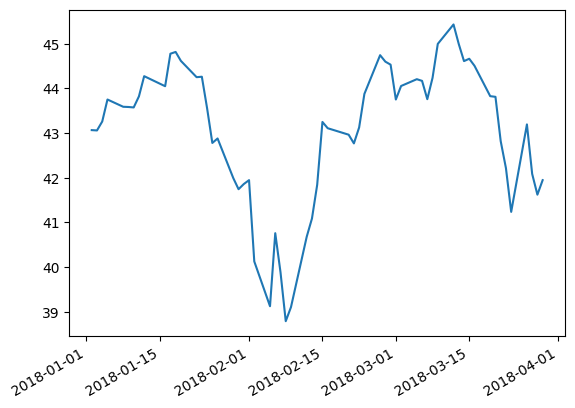

In [18]:
import FinanceDataReader as fdr
fdr.__version__

# 애플(AAPL), 2018-01-01 ~ 2018-03-30
df = fdr.DataReader('AAPL', '2018-01-01', '2018-03-30')
df['Close'].plot()



✅ 데이터 시각화


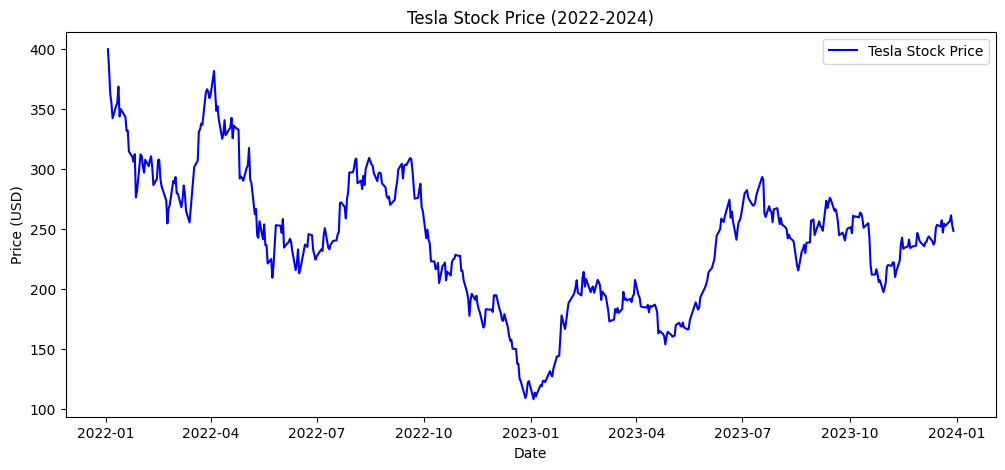

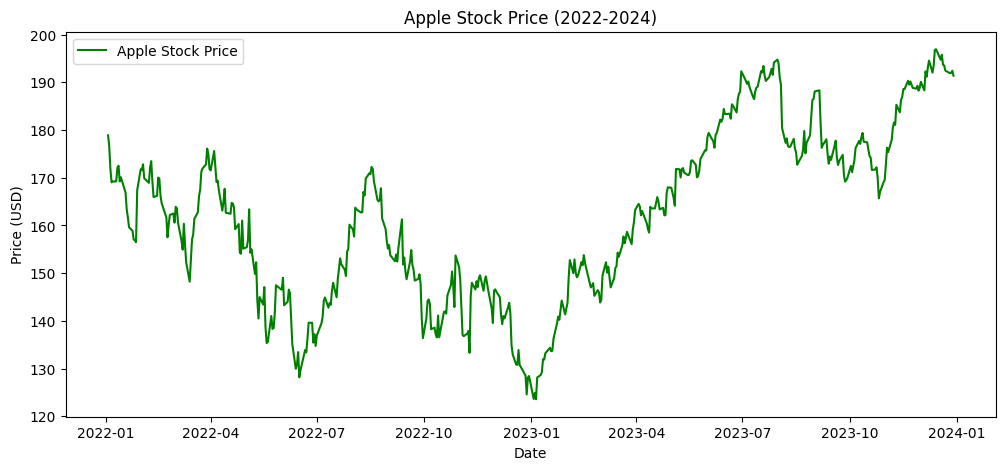

In [8]:
import matplotlib.pyplot as plt

# 테슬라 주가 시각화
plt.figure(figsize=(12, 5))
plt.plot(df_tesla.index, df_tesla["Close"], label="Tesla Stock Price", color="blue")
plt.title("Tesla Stock Price (2022-2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# 애플 주가 시각화
plt.figure(figsize=(12, 5))
plt.plot(df_apple.index, df_apple["Close"], label="Apple Stock Price", color="green")
plt.title("Apple Stock Price (2022-2024)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()
